# Fussing with $K_d$(PAR)

In [19]:
# imports
import numpy as np
from matplotlib import pyplot as plt

from ocpy.hydrolight import loisel23

# Load up Loisel

In [4]:
ds = loisel23.load_ds(1,0)

In [6]:
ds

<xarray.Dataset> Size: 18MB
Dimensions:  (Lambda: 81, IOP_Scenario: 3320)
Coordinates:
  * Lambda   (Lambda) float32 324B 350.0 355.0 360.0 365.0 ... 740.0 745.0 750.0
Dimensions without coordinates: IOP_Scenario
Data variables: (12/17)
    Rrs      (IOP_Scenario, Lambda) float32 1MB 0.01084 0.01084 ... 2.8e-05
    Ed_0+    (IOP_Scenario, Lambda) float32 1MB 0.7753 0.7314 ... 1.237 1.222
    Lw       (IOP_Scenario, Lambda) float32 1MB 0.0084 0.007927 ... 3.421e-05
    Lu_0+    (IOP_Scenario, Lambda) float32 1MB 0.04003 0.03817 ... 0.0624
    a        (IOP_Scenario, Lambda) float32 1MB 0.03096 0.02925 ... 2.83 2.85
    anw      (IOP_Scenario, Lambda) float32 1MB 0.02386 0.02245 ... 0.0004
    ...       ...
    bph      (IOP_Scenario, Lambda) float32 1MB 0.04521 0.04454 ... 0.1008
    bd       (IOP_Scenario, Lambda) float32 1MB 0.03323 0.03239 ... 0.03513
    bb       (IOP_Scenario, Lambda) float32 1MB 0.006968 0.006587 ... 0.001876
    bbnw     (IOP_Scenario, Lambda) float32 1MB 0.00105 0.001028 ... 0.001641
    bbph     (IOP_Scenario, Lambda) float32 1MB 0.0004521 0.0004454 ... 0.001008
    bbd      (IOP_Scenario, Lambda) float32 1MB 0.0005982 0.000583 ... 0.0006324

# Pick an example

In [17]:
wave = ds.Lambda.data
wave.shape

(81,)

In [46]:
idx = 170
acdom = ds.ag[idx]
aph = ds.aph[idx]
aw = ds.a[idx] - ds.anw[idx]
atot = ds.a[idx]
#
bb = ds.bb[idx]
bbp = ds.bbnw[idx]
bbph = ds.bbph[idx]
bbw = ds.bb[idx] - ds.bbnw[idx]
# E
Ed = ds['Ed_0+'][idx]

# Calculate $K_d$

## Lee approximation

## $K_d \approx (1+0.005 \theta_s) a  + 4.18 [1-0.52 \exp(-10.8 a)] b_b$

In [20]:
def calc_Kd(a,bb):
    return a + 4.18*(1. - np.exp(-10.8*a)) * bb

## Plot em

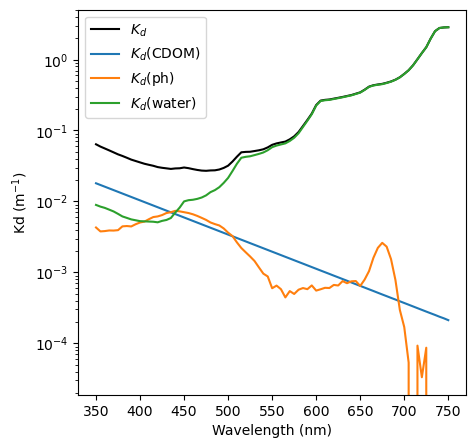

In [33]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, calc_Kd(atot, bb), label=r'$K_d$', color='k')
ax.plot(wave, calc_Kd(acdom, 0.), label=r'$K_d$(CDOM)')
ax.plot(wave, calc_Kd(aph, bbph), label=r'$K_d$(ph)')
ax.plot(wave, calc_Kd(aw, bbw), label=r'$K_d$(water)')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'Kd (m$^{-1}$)')
#
ax.legend()
ax.set_yscale('log')
#
plt.savefig('Kd_components.png', dpi=300)
plt.show()

## Compare $a$

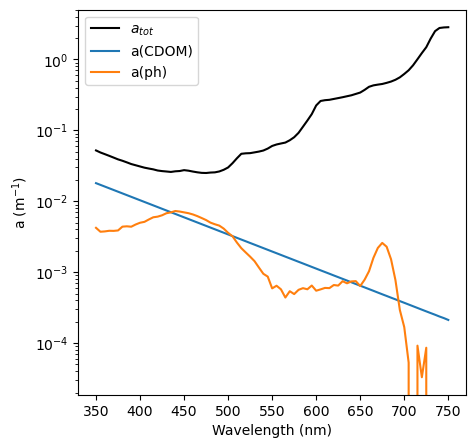

In [37]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, atot, label=r'$a_{tot}$', color='k')
ax.plot(wave, acdom, label=r'a(CDOM)')
ax.plot(wave, aph, label=r'a(ph)')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'a (m$^{-1}$)')
#
ax.legend()
ax.set_yscale('log')
#
#plt.savefig('Kd_components.png', dpi=300)
plt.show()

# PAR

## Plot $E_d$

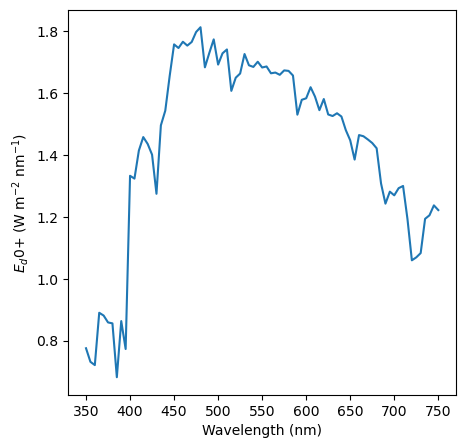

In [48]:
#Ed0 = ds['Ed_0+'][0]
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, Ed)
#ax.plot(wave, Ed0)
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$E_d$0+ (W m$^{-2}$ nm$^{-1}$)')
#
#ax.legend()
#ax.set_yscale('log')
#
#plt.savefig('Kd_components.png', dpi=300)
plt.show()

## PAR

## $PAR \equiv \int_{400nm}^{700nm} \frac{E_0 \lambda}{hc} \, d\lambda$

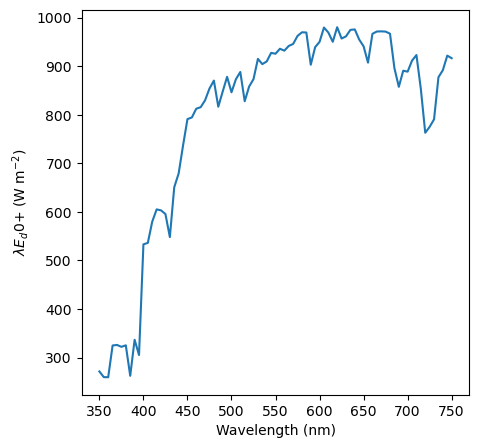

In [49]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, Ed*wave)
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$\lambda E_d$0+ (W m$^{-2}$)')
#
#ax.legend()
#ax.set_yscale('log')
#
#plt.savefig('Kd_components.png', dpi=300)
plt.show()

## Cumulative

In [50]:
good_wv = (wave >= 400.) & (wave <= 700)
PAR_cum = np.cumsum((Ed*wave)[good_wv])

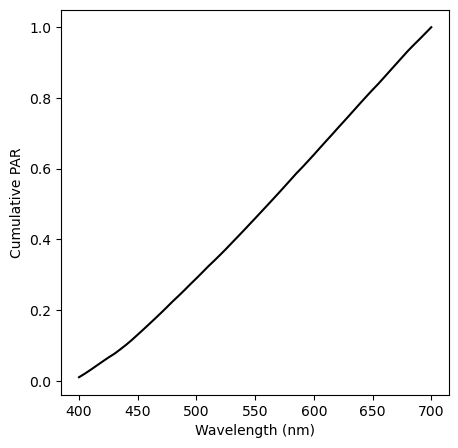

In [54]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave[good_wv], PAR_cum/PAR_cum[-1], 'k')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Cumulative PAR')
#
#ax.legend()
#ax.set_yscale('log')
#
plt.savefig('PAR_cumulative.png', dpi=300)
plt.show()

# Eutrophic water

In [55]:
idx = 2773
acdom = ds.ag[idx]
aph = ds.aph[idx]
aw = ds.a[idx] - ds.anw[idx]
atot = ds.a[idx]
#
bb = ds.bb[idx]
bbp = ds.bbnw[idx]
bbph = ds.bbph[idx]
bbw = ds.bb[idx] - ds.bbnw[idx]
# E
Ed = ds['Ed_0+'][idx]

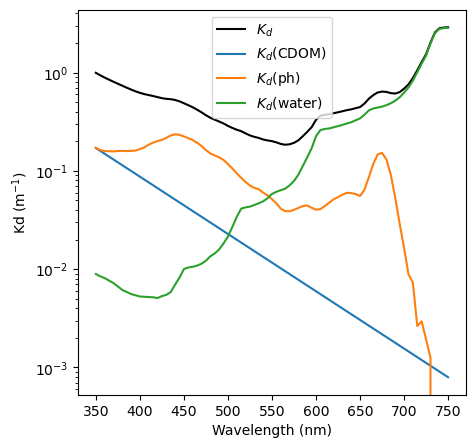

In [57]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.plot(wave, calc_Kd(atot, bb), label=r'$K_d$', color='k')
ax.plot(wave, calc_Kd(acdom, 0.), label=r'$K_d$(CDOM)')
ax.plot(wave, calc_Kd(aph, bbph), label=r'$K_d$(ph)')
ax.plot(wave, calc_Kd(aw, bbw), label=r'$K_d$(water)')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'Kd (m$^{-1}$)')
#
ax.legend()
ax.set_yscale('log')
#
plt.savefig('Kd_eutrophic.png', dpi=300)
plt.show()